In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import math
import numpy as np
import networkx as nx
import random as rn
import scipy
# import igraph
from matplotlib import colors
import scipy.io as sio
import sklearn as skl
from sklearn import covariance
import copy
print 'done'

done


In [2]:
#[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']
plt.style.use("ggplot")

In [8]:
# MEG_DICT = sio.loadmat('ans.mat') # MEG dictionary saved in Matlab - in this case it is closed eye resting state.
# MEG_DATA = MEG_DICT.items() # Accesses the dictionary elements
# single_channel = []
# multi_channel = []

# MEG_DICTexr = sio.loadmat('resting_state.mat') # MEG dictionary saved in Matlab - in this case it is closed eye resting state.
# MEG_DATAexr = MEG_DICTexr.items() # Accesses the dictionary elements

# MEG_DICTex1 = sio.loadmat('xenon_1.mat') # MEG dictionary saved in Matlab - XENON 1.
# MEG_DATAex1 = MEG_DICTex1.items() # Accesses the dictionary elements

# MEG_DICTex2 = sio.loadmat('xenon_2.mat') # MEG dictionary saved in Matlab - XENON2.
# MEG_DATAex2 = MEG_DICTex2.items() # Accesses the dictionary elements

# MEG_DICTex3 = sio.loadmat('xenon_3.mat') # MEG dictionary saved in Matlab - XENON3.
# MEG_DATAex3 = MEG_DICTex3.items() # Accesses the dictionary elements

MEG_DICTex4 = sio.loadmat('xenon_4.mat') # MEG dictionary saved in Matlab - XENON4.
MEG_DATAex4 = MEG_DICTex4.items() # Accesses the dictionary elements

print 'done'

done


In [2]:
def global_efficiency(G, weight=None):
    N = len(G)
    if N < 2:
        return 0   
    inv_lengths = []
    for node in G:
        if weight is None:
            lengths = nx.single_source_shortest_path_length(G, node)
        else:
            lengths=nx.single_source_dijkstra_path_length(G,node,weight=weight)

        inv = [1/x for x in lengths.values() if x is not 0]
        inv_sum = sum(inv)
        inv_lengths.append(inv_sum)  # add results, one per node

    return sum(inv_lengths)/(N*(1.0*N-1))

def f1(x):
    return 1.0/math.sqrt(x)
f1 = np.vectorize(f1)
print 'fin'

fin


In [3]:
def global_spl(G, weight=None):
    N = len(G)
    if N < 2:
        return 0   
    inv_lengths = []
    for node in G:
        if weight is None:
            lengths = nx.single_source_shortest_path_length(G, node)
        else:
            lengths=nx.single_source_dijkstra_path_length(G,node,weight=weight)

        inv = [x for x in lengths.values() if x is not 0]
        inv_sum = sum(inv)
        inv_lengths.append(inv_sum)  # add results, one per node

    return sum(inv_lengths)/(N*(1.0*N-1))
print'fin'

fin


In [210]:
n = 102 # Dimension of covariance estimate n x n
fl = int(0.75*n*n) # Proportion of entries to be set to zero.
a = np.random.normal(0, 0.1,(n,n))
true_cov = np.tril(a) + np.tril(a, -1).T
true_cov = true_cov*0.2
for i in range(0,fl):
    x = rn.randint(0,len(true_cov)-1)
    y = rn.randint(0,len(true_cov)-1)
    true_cov[x][y] = 0
    true_cov[y][x] = 0
np.fill_diagonal(true_cov,1)

# print true_cov
# print 
print np.linalg.eigvals(true_cov)

[ 0.80380571  1.18718619  0.82142668  1.1725782   0.82710519  0.83864561
  0.83918296  1.16465348  1.15658688  1.15134177  1.14916991  1.14489999
  0.85153751  0.85453219  1.13779555  0.85865038  0.86075354  1.13337906
  1.13265963  1.13056866  0.86779564  0.87062248  1.12671147  1.12064395
  0.87620496  0.87649872  0.8837875   1.11835999  0.88944344  1.11164248
  1.11064015  0.89267919  1.10317347  1.10172802  1.09852908  0.89642477
  0.89976344  0.90283361  0.90589861  1.09331087  0.91128663  0.91456328
  0.92040397  1.08790329  1.08542628  1.0830926   1.08020995  1.07707257
  0.92350599  0.92475149  0.92433921  0.93066515  1.07416491  1.07207369
  1.0697818   0.93227397  1.06612453  1.06460644  0.93611365  0.94051993
  0.94425979  1.06025674  0.95056641  0.94191109  0.95272607  0.95533896
  1.05555398  1.0495172   0.95743835  0.96276253  1.04751066  0.96429016
  0.96915169  1.04622406  1.04412237  1.03750499  1.03448558  1.03143221
  1.02872963  1.04243337  1.02610747  0.97937667  0

In [211]:
True_cov = true_cov
True_Mean = [0 for i in range(0,n)]
# TEST = np.random.multivariate_normal(True_Mean, True_cov, 2000).T
print 'fin'


fin


0.123629726294
0.083582298667


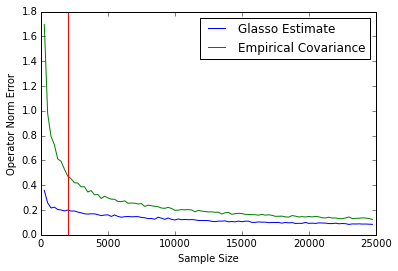

In [217]:
# ERROR_EST = []
# ERROR_EMP = []
# SAMP = 250
# CAP = 100
# SAMPLE_SIZE = [x*SAMP for x in range(1,CAP)]

# for NN in range(1,CAP):
#     TEST = np.random.multivariate_normal(True_Mean, True_cov, SAMP*NN ).T
#     gl_model = skl.covariance.GraphLassoCV(alphas=10, n_refinements=2, cv=5, assume_centered=False, max_iter=100, tol = 0.001)
#     gl_model.fit(TEST.T)
#     ERROR_EST.append(np.linalg.norm((True_cov-gl_model.covariance_),ord=2))
#     ERROR_EMP.append(np.linalg.norm((True_cov-np.cov(TEST)),ord=2))
    
print min(ERROR_EMP)
print min(ERROR_EST)
plt.plot(SAMPLE_SIZE, ERROR_EST, label = 'Glasso Estimate')
plt.plot(SAMPLE_SIZE, ERROR_EMP, label = 'Empirical Covariance')
# plt.title('Comparison of Glasso and Empirical Covariance')
plt.xlabel('Sample Size')
plt.ylabel('Operator Norm Error')
plt.axvline(2000,color='r')
plt.legend()
plt.savefig('Operator_Error_Test.eps',format = 'eps')



In [ ]:
n = 102 # Dimension of covariance estimate n x n
fl = int(0.65*n*n) # Proportion of entries to be set to zero.
a = np.random.normal(0, 0.1,(n,n))
true_cov = np.tril(a) + np.tril(a, -1).T
true_cov = true_cov*0.2
for i in range(0,fl):
    x = rn.randint(0,len(true_cov)-1)
    y = rn.randint(0,len(true_cov)-1)
    true_cov[x][y] = 0
    true_cov[y][x] = 0
np.fill_diagonal(true_cov,1)
print
print true_cov[0]
print 
print np.linalg.eigvals(true_cov)

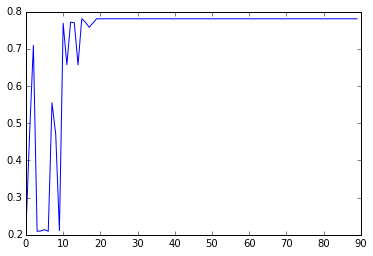

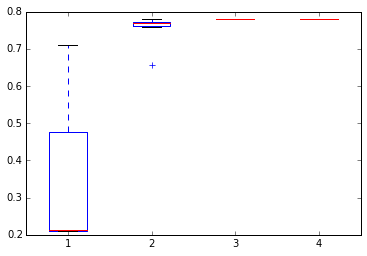

In [101]:
# TEST = np.random.multivariate_normal(True_Mean, true_cov, 2000).T

zero_fid = []

for z in range(1,10):
    for x in range(0,10):
        TEST = np.random.multivariate_normal(True_Mean, true_cov, z*1000).T
        gl_model = skl.covariance.GraphLassoCV(alphas=10, n_refinements=2, cv=5, assume_centered=True, max_iter=100, tol = 0.001)
        gl_model.fit(TEST.T)
        tally = 0
        for i in range(0,102):
            for j in range(0,102):
                if True_cov[i][j]==0 and gl_model.covariance_[i][j]!=0:
                    tally = tally+1
                if True_cov[i][j]!=0 and gl_model.covariance_[i][j]==0:
                    tally = tally+1
        zero_fid.append(tally/(102.0*102.0))

plt.plot(zero_fid)
plt.show()
# print np.mean(zero_fid[0:50])
# print np.mean(zero_fid[50:100])
k = 10
boxes_65 = copy.deepcopy([zero_fid[0:k],zero_fid[k:k*2],zero_fid[k*2:k*3],zero_fid[k*3:k*4]])
plt.boxplot(boxes_65)
plt.show()

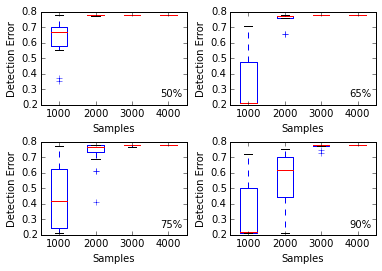

In [100]:
# boxes_k  = [boxes_50,boxes_65,boxes_75,boxes_90]

# print 'fin'
# boxes_90 = [BOXES[3][0],BOXES[3][1],BOXES[3][2],BOXES[3][3]]
# boxes_65 = [BOXES[1][0],BOXES[1][1],BOXES[1][2],BOXES[1][3]]
# boxes_50 = [BOXES[0][0],BOXES[0][1],BOXES[0][2],BOXES[0][3]]
# boxes_75 = [BOXES[2][0],BOXES[2][1],BOXES[2][2],BOXES[2][3]]

# plt.boxplot(boxes_90)
# plt.boxplot(boxes_50)
# plt.boxplot(boxes_75)
# fig = plt.figure(1) #figsize=(5,5)
# fig.subplots_adjust(hspace=.4)
# fig.subplots_adjust(wspace=.3)
# plt.subplot(221)
# plt.boxplot(boxes_50)
# plt.ylim(0.2,0.8)
# plt.xticks([1,2,3,4],['1000', '2000', '3000', '4000'])
# plt.xlabel('Samples')
# plt.ylabel('Detection Error')
# # plt.title('50% Sparsity', fontsize=10)
# plt.text(3.8, 0.25, '50%', fontsize=10)
# plt.subplot(222)
# plt.boxplot(boxes_65)
# plt.xticks([1,2,3,4],['1000', '2000', '3000', '4000'])
# plt.xlabel('Samples')
# plt.ylabel('Detection Error')
# plt.text(3.8, 0.25, '65%', fontsize=10)
# # plt.title('65% Sparsity', fontsize=10)
# plt.subplot(223)
# plt.boxplot(boxes_75)
# plt.xticks([1,2,3,4],['1000', '2000', '3000', '4000'])
# plt.xlabel('Samples')
# plt.ylabel('Detection Error')
# plt.text(3.8, 0.25, '75%', fontsize=10)
# # plt.title('75% Sparsity', fontsize=10)
# plt.subplot(224)
# plt.boxplot(boxes_90)
# plt.xticks([1,2,3,4],['1000', '2000', '3000', '4000'])
# plt.xlabel('Samples')
# plt.ylabel('Detection Error')
# plt.text(3.8, 0.25, '90%', fontsize=10)
# # plt.title('90% Sparsity', fontsize=10)
# # plt.savefig('Detection_Error_Test.eps',format = 'eps')
# plt.show()



In [34]:
master_set = copy.deepcopy(MEG_DATAexr[1][1][0:102,0:300000])*1e12
nets = 150
graphs = [[]for i in range(0,300)]
PCN = [[]for i in range(0,300)]
count = 0
it = 0
ref = 2
cvv = 5
step = 2000
print 'fin'

fin


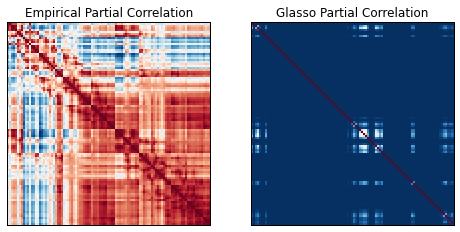

finished


In [65]:
# master_set = copy.deepcopy(MEG_DATAex4[1][1][0:102,0:300000])*1e12

# loop_set = master_set[0:102,8000:10000]
# Emp_cov = np.cov(loop_set)
# diag = np.diagonal(Emp_cov)
# diag_inverse = np.diag(f1(diag))
# partial_cor_emp = diag_inverse.dot(Emp_cov).dot(1.0*diag_inverse)


# gl_model = skl.covariance.GraphLassoCV(alphas=10, n_refinements=2, cv=5, assume_centered=False, max_iter=100, tol = 0.001)
# gl_model.fit(loop_set.T)
# diag = np.diagonal(gl_model.covariance_)
# diag_inverse = np.diag(f1(diag))
# partial_cor_gl = diag_inverse.dot(gl_model.covariance_).dot(1.0*diag_inverse)


#fig = plt.figure(1)#,figsize=(10,15))
# fig.subplots_adjust(hspace=.5)
# fig.subplots_adjust(wspace=.3)

# plasma = plt.get_cmap('hot')
# cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', ['blue','red','black'], 256)
# img = plt.imshow(partial_cor_emp, interpolation='nearest', cmap = plasma)
# plt.colorbar(img,cmap=cmap2)
# # plt.subplot(221)
# plt.show()

# plasma = plt.get_cmap('hot')
# cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', ['blue','red','black'], 256)
# img = plt.imshow(partial_cor_gl, interpolation='nearest', cmap = plasma)
# plt.colorbar(img,cmap=cmap2)
# # plt.subplot(222)
# plt.show()
# precs = [('Empirical', partial_cor_emp), ('Glasso', partial_cor_gl)]

# for i, (name, this_prec) in enumerate(precs):
#     fig = plt.figure(1,figsize = (8,8))
#     ax = plt.subplot(1, 2, i + 1)
#     plt.imshow(this_prec, interpolation='nearest', cmap=plt.cm.RdBu_r)
#     plt.xticks(())
#     plt.yticks(())
#     plt.title('%s Partial Correlation' % name)
#     ax.set_axis_bgcolor('.7')
# plt.savefig('Matrix_col.eps',format = 'eps')
# plt.show()
# print 'finished'

In [35]:
for j in range(0,nets):
    loop_set = master_set[0:102,count:(count+step)]
    gl_model = skl.covariance.GraphLassoCV(alphas=10, n_refinements=ref, cv=cvv, assume_centered=False, max_iter=100, tol = 0.001)
    gl_model.fit(loop_set.T)
    diag = np.diagonal(gl_model.covariance_)
    diag_inverse = np.diag(f1(diag))
    partial_cor = diag_inverse.dot(gl_model.covariance_).dot(1.0*diag_inverse)
    PCN[it] = partial_cor
    it = it+1
    count = count+step
print 'finished'


for j in range(0,nets):
    loop_s = [[] for k in range(0,102)]
    for y in range(0,102):    
        z = rn.randint(0,(300000-step))
        loop_s[y] = master_set[y][z:(z+step)]
    gl_model = skl.covariance.GraphLassoCV(alphas=10, n_refinements=ref, cv=cvv, assume_centered=False, max_iter=100, tol = 0.001)
    gl_model.fit(np.array(loop_s).T)
    diag = np.diagonal(gl_model.covariance_)
    diag_inverse = np.diag(f1(diag))
    partial_cor = diag_inverse.dot(gl_model.covariance_).dot(1.0*diag_inverse)
    PCN[it] = partial_cor
    it = it+1
print 'finished'

C:\Users\owner\Anaconda\lib\site-packages\numpy\linalg\linalg.py:1741: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
C:\Users\owner\Anaconda\lib\site-packages\sklearn\covariance\graph_lasso_.py:230: RuntimeWarning: invalid value encountered in multiply
  * coefs)
C:\Users\owner\Anaconda\lib\site-packages\sklearn\covariance\graph_lasso_.py:232: RuntimeWarning: invalid value encountered in multiply
  * coefs)


finished
finished


In [36]:
rest_2s_noise_5k_2r = np.array(PCN)
np.save('rest_2s_noise_5k_2r',rest_2s_noise_5k_2r)
NOISE = np.load('rest_2s_noise_5k_2r.npy')
# print (NOISE[0])
# nets = 150
print'fin'


fin


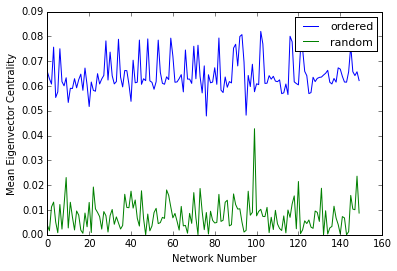

In [56]:
# EC=[]
# ECS = []
# for i in range(0,len(NOISE)):
#     EC.append(np.mean(nx.algorithms.centrality.eigenvector_centrality_numpy(nx.Graph(NOISE[i])).values()))
#     ECS.append(np.std((nx.algorithms.centrality.eigenvector_centrality_numpy(nx.Graph(NOISE[i])).values())))
# TEST_M = [np.mean(EC[0:nets]),np.mean(EC[nets:nets*2])]
# print TEST_M
# DIFF = TEST_M[0]- TEST_M[1]
# print DIFF

plt.plot(EC[0:150],label = 'ordered')
plt.plot(EC[150:300], label = 'random')
plt.xlabel('Network Number')
plt.ylabel('Mean Eigenvector Centrality')
plt.legend(fontsize = 11)
# plt.savefig('Noise_evc_ts.eps',format = 'eps')
# plt.show()
# plt.errorbar(np.arange(0,len(EC)),EC,ECS,marker = 'o')

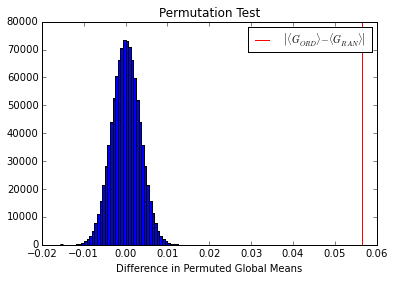

Test Stat 0.0565605837205 number of iterations = 1000000
Min from test -0.0155282598306
Max from test 0.0155375540059
Number of values that were greater in magnitude than the test parameter 0
Percentage of values that where greater in magnitude = 0.0%
Results in a p-value of 0.0


In [72]:
# D_test = []
# ECMM = copy.deepcopy(EC[0:nets])
# ECMM.extend(copy.deepcopy(EC[nets:nets*2]))
# Iter = 1000000

# for i in range(0,Iter):
#     np.random.shuffle(ECMM)
#     TEST_MEAN = [np.mean(ECMM[0:nets]),np.mean(ECMM[nets:nets*2])]
#     D_test.append((TEST_MEAN[0] - TEST_MEAN[1]))

# tally = 0
# for k in range(0,len(D_test)):
#     if abs(D_test[k])>=abs(DIFF):
#         tally = tally+1

plt.hist(D_test,bins=50)
plt.axvline(x=DIFF,color='red', label = r' $\left|\langle G_{ORD}\rangle -\langle G_{RAN}\rangle\right|$ ')
plt.legend(fontsize = 10)
plt.title('Permutation Test')
plt.xlabel('Difference in Permuted Global Means')
# plt.savefig('Noise_permutation.eps',format = 'eps')
plt.show()
print 'Test Stat ' +str(DIFF) + " number of iterations = "+str(Iter)
print "Min from test " +str(min(D_test))
print "Max from test " + str(max(D_test))
print 'Number of values that were greater in magnitude than the test parameter ' +str(tally)
print 'Percentage of values that where greater in magnitude = ' +str(1.0*tally/(1.0*Iter)*100)+"%"
print 'Results in a p-value of ' +str((1.0*tally/(1.0*Iter))) 

### Data Files loaded here

In [2]:
# MEANS = np.load('complete_graph_metrics_2s5k2r.npy')
MEANS = np.load('gmets_complete_eeg.npy')
# STDS = np.load('std_graph_metrics_2s5k2r.npy')
print 'fin'

fin


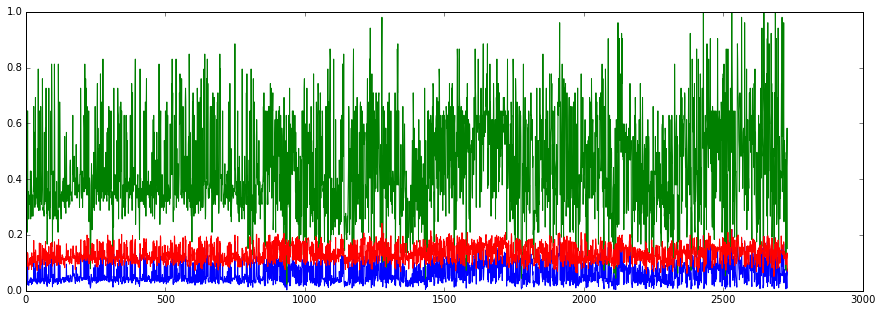

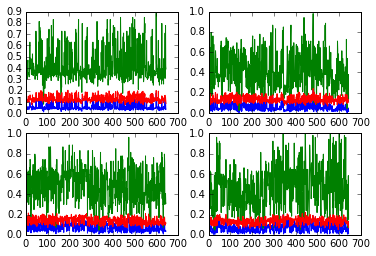

In [191]:
# [g_wspl, g_spl, e_spl, g_str, g_deg, e_deg, g_wcc, g_cc, e_cc, g_evcw, g_evc, e_evc, g_efw, g_ef, e_gef]


fig = plt.figure(1,figsize=(15,5))
fig.subplots_adjust(hspace=.4)
# fig.subplots_adjust(wspace=.3)
# plt.subplot(221)
# plt.plot(MEANS[12][0:150])
# plt.plot(MEANS[13][0:150])
# plt.plot(MEANS[14][0:150])
# plt.ylim(0,1)

plt.plot(MEANS[12])
plt.plot(MEANS[13])
plt.plot(MEANS[14])
plt.show()
# plt.xlabel('Samples')
# plt.ylabel('Detection Error')

plt.subplot(221)
plt.plot(MEANS[12][150:795])
plt.plot(MEANS[13][150:795])
plt.plot(MEANS[14][150:795])


plt.subplot(222)
plt.plot(MEANS[12][795:1440])
plt.plot(MEANS[13][795:1440])
plt.plot(MEANS[14][795:1440])


plt.subplot(223)
plt.plot(MEANS[12][1440:2085])
plt.plot(MEANS[13][1440:2085])
plt.plot(MEANS[14][1440:2085])

plt.subplot(224)
plt.plot(MEANS[12][2085:2730])
plt.plot(MEANS[13][2085:2730])
plt.plot(MEANS[14][2085:2730])


# plt.savefig('Detection_Error_Test.eps',format = 'eps')
plt.show()

2825
2730


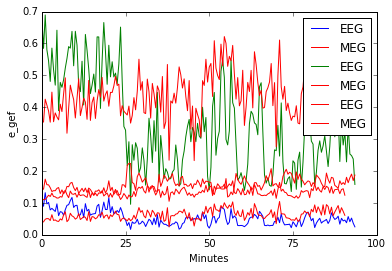

In [224]:
# names = ['g_wspl', 'g_spl', 'e_spl', 'g_str', 'g_deg', 'e_deg', 'g_wcc', 'g_cc', 'e_cc', 'g_evcw', 'g_evc', 'e_evc', 'g_efw', 'g_ef', 'e_gef']

# EEG_MEANS = copy.deepcopy(MEANS)
# MEG_MEANS = np.load('complete_graph_metrics_2s5k2r.npy')

print len(EEG_MEANS[0])
print len(MEG_MEANS[0])
for q in range(12,15):#len(EEG_MEANS)):
    total_time_eeg = 2*len(EEG_MEANS[0])
    AVTS = []
    x = q
    count = 0
    sec = 30 # Intervals of time length. Takes into account that the networks are based on 2 seconds of activity
    total_div = total_time_eeg/sec
    EEGX = total_div
    step = sec/2
    #x_axis = [sec*k for k in range(0,EEGX)]
    
    for i in range(0,EEGX):
        AVTS.append(np.mean(EEG_MEANS[x][count:count+step]))
        count = count+step
    
    plt.plot(AVTS,label='EEG')
    #plt.xticks([1000,2000,3000,4000,5000,6000],['0', '20', '40', '60', '80','100'],fontsize = 10)
    plt.ylabel(names[q])
    
    total_time_meg = 2*len(MEG_MEANS[0])
    total_div = total_time_meg/sec
    count = 0
    MAVTS = []
    MEGX = total_div
    #x_axis = [sec*k for k in range(0,MEGX)]
    for i in range(0,MEGX):
        MAVTS.append(np.mean(MEG_MEANS[x][count:count+step]))
        count = count+step
    plt.plot(MAVTS,color='r',label= 'MEG')
    plt.xticks([0,50,100,150,200],['0', '25', '50', '75', '100'],fontsize = 10)
#     plt.fill([0,10,10,0], [0.0,0.0,0.16,0.16], 'black',alpha=0.2)
#     plt.fill([10,54,54,10], [0.0,0.0,0.16,0.16], 'black',alpha=0.15)
#     plt.fill([54,98,98,54], [0.0,0.0,0.16,0.16], 'black',alpha=0.25)
#     plt.fill([98,142,142,98], [0.0,0.0,0.16,0.16], 'black',alpha=0.3)
#     plt.fill([142,186,186,142], [0.0,0.0,0.16,0.16], 'black',alpha=0.40)
#     plt.xlim(0,186)
#     plt.ylim(0,0.16)
    plt.xlabel('Minutes')
    plt.ylabel(names[q])
    plt.legend()
#     plt.show()


(array([ 11.,  14.,   8.,  11.,  11.,  13.,   9.,   6.,  11.,   6.]),
 array([ 0.00750663,  0.10669053,  0.20587442,  0.30505832,  0.40424222,
         0.50342611,  0.60261001,  0.70179391,  0.80097781,  0.9001617 ,
         0.9993456 ]),
 <a list of 10 Patch objects>)

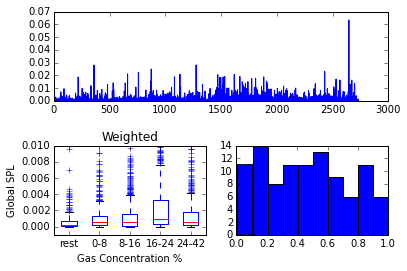

In [192]:
# x = 5
#2600:2700
# plt.errorbar(np.arange(0,len(MEANS[x][2600:2700])),MEANS[x][2600:2700], STDS[x][2600:2700],marker = 'o')#, linestyle='None', marker='^')
# plt.errorbar(np.arange(0,len(MEANS[x][0:150])),MEANS[x][0:150], STDS[x][0:150],marker = 'o')
# plt.show()
# plt.plot(MEANS[2][0:50])
# plt.plot(MEANS[2][2600:2650])


fig = plt.figure(1)#,figsize=(10,15))
fig.subplots_adjust(hspace=.5)
# fig.subplots_adjust(wspace=.3)
# [g_wspl, g_spl, e_spl, g_str, g_deg, e_deg, g_wcc, g_cc, e_cc, g_evcw, g_evc, e_evc, g_efw, g_ef, e_gef]
# plt.subplot(222)
plt.subplot2grid((2,2), (1,0), colspan = 1)
z = 0
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration %')
# plt.setp(xtickNames, rotation=45, fontsize=8)
plt.ylim(-0.001,0.01)
plt.ylabel('Global SPL')
plt.title('Weighted')

# plt.subplot(221)
plt.subplot2grid((2,2), (0,0), colspan = 2)
plt.plot(MEANS[z])

# plt.subplot(223)
plt.subplot2grid((2,2), (1,1), colspan = 1)
plt.hist((np.random.rand(100,1)))

# ax1 = fig.add_subplot(221)
# ax1 = plt.subplot2grid((3,2), (0,0))

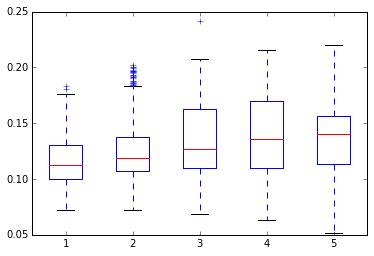

In [111]:
z = 14
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
# plt.ylim()
plt.show()

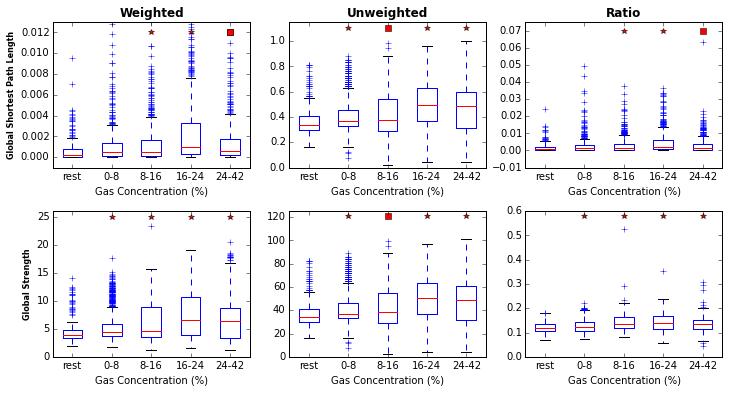

In [330]:
fig = plt.figure(1,figsize=(12,6))
fig.subplots_adjust(hspace=.3)
# fig.subplots_adjust(wspace=.3)
# [g_wspl, g_spl, e_spl, g_str, g_deg, e_deg, g_wcc, g_cc, e_cc, g_evcw, g_evc, e_evc, g_efw, g_ef, e_gef]
plt.subplot(231)
z = 0
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')
# plt.setp(xtickNames, rotation=45, fontsize=8)
plt.ylim(-0.001,0.013)
plt.plot(5,0.012,'rs')
plt.plot(5,0.012,'rs')
plt.plot(4,0.012,'r*')
plt.plot(3,0.012,'r*')
plt.ylabel('Global Shortest Path Length',fontsize=8, fontweight = 'bold')
# plt.ylabel('Global SPL')
plt.title('Weighted',fontweight = 'bold')

plt.subplot(232)
z = 1
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')
plt.plot(2,1.10,'r*')
plt.plot(3,1.10,'rs')
plt.plot(4,1.10,'r*')
plt.plot(5,1.10,'r*')
plt.ylim(0,1.15)
plt.title('Unweighted',fontweight = 'bold')

plt.subplot(233)
z = 2
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)

plt.plot(3,0.07,'r*')
plt.plot(4,0.07,'r*')
plt.plot(5,0.07,'rs')
plt.ylim(-0.01,0.075)
plt.xlabel('Gas Concentration (%)')
plt.title('Ratio',fontweight = 'bold')

plt.subplot(234)
z = 3
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.ylabel('Global Strength',fontsize=8, fontweight = 'bold')

plt.plot(2,25,'r*')
plt.plot(3,25,'r*')
plt.plot(4,25,'r*')
plt.plot(5,25,'r*')
plt.ylim(0,26)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10)

plt.subplot(235)
z = 4
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.plot(2,121,'r*')
plt.plot(3,121,'rs')
plt.plot(4,121,'r*')
plt.plot(5,121,'r*')
plt.ylim(0,125)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')

plt.subplot(236)
z = 5
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.plot(2,0.58,'r*')
plt.plot(3,0.58,'r*')
plt.plot(4,0.58,'r*')
plt.plot(5,0.58,'r*')
# plt.ylim(0,125)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')
plt.savefig('Box_gm_1.eps',format='eps')
plt.show()

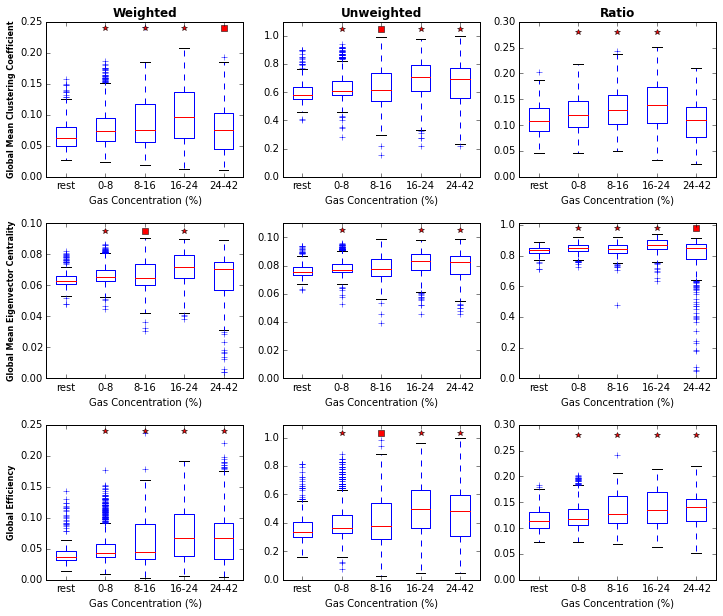

In [351]:
fig = plt.figure(1,figsize=(12,10))
fig.subplots_adjust(hspace=.3)
# fig.subplots_adjust(wspace=.3)
# [g_wspl, g_spl, e_spl, g_str, g_deg, e_deg, g_wcc, g_cc, e_cc, g_evcw, g_evc, e_evc, g_efw, g_ef, e_gef]



plt.subplot(331)
z = 6
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.ylabel('Global Mean Clustering Coefficient',fontsize=8, fontweight = 'bold')
plt.boxplot(boxes_total)
plt.title('Weighted', fontweight = 'bold')
plt.plot(2,0.24,'r*')
plt.plot(3,0.24,'r*')
plt.plot(4,0.24,'r*')
plt.plot(5,0.24,'rs')
# plt.ylim(0,125)

plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')

plt.subplot(332)
z = 7
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.title('Unweighted', fontweight = 'bold')
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.plot(2,1.05,'r*')
plt.plot(3,1.05,'rs')
plt.plot(4,1.05,'r*')
plt.plot(5,1.05,'r*')
plt.ylim(0,1.1)
plt.xlabel('Gas Concentration (%)')

plt.subplot(333)
z = 8
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.title('Ratio', fontweight = 'bold')
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.plot(2,0.28,'r*')
plt.plot(3,0.28,'r*')
plt.plot(4,0.28,'r*')
# plt.plot(5,0.28,'r*')
# plt.ylim(0,125)
plt.xlabel('Gas Concentration (%)')

plt.subplot(334)
z = 9
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
# plt.ylabel('Global EVC')
plt.ylabel('Global Mean Eigenvector Centrality',fontsize=8, fontweight = 'bold')
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.plot(2,0.095,'r*')
plt.plot(3,0.095,'rs')
plt.plot(4,0.095,'r*')
# plt.plot(5,0.095,'r*')
# plt.ylim(0,125)
plt.xlabel('Gas Concentration (%)')

plt.subplot(335)
z = 10
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.plot(2,0.105,'r*')
# plt.plot(3,0.11,'rs')
plt.plot(4,0.105,'r*')
plt.plot(5,0.105,'r*')
plt.ylim(0,0.11)
plt.xlabel('Gas Concentration (%)')

plt.subplot(336)
z = 11
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)

plt.plot(2,0.98,'r*')
plt.plot(3,0.98,'r*')
plt.plot(4,0.98,'r*')
plt.plot(5,0.98,'rs')
plt.ylim(0,1.01)
plt.xlabel('Gas Concentration (%)')

plt.subplot(337)
z = 12
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
# plt.ylabel('Global EFF')
plt.ylabel('Global Efficiency',fontsize=8, fontweight = 'bold')
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.plot(2,0.24,'r*')
plt.plot(3,0.24,'r*')
plt.plot(4,0.24,'r*')
plt.plot(5,0.24,'r*')
# plt.ylim(0,1.01)
plt.xlabel('Gas Concentration (%)')

plt.subplot(338)
z = 13
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.plot(2,1.03,'r*')
plt.plot(3,1.03,'rs')
plt.plot(4,1.03,'r*')
plt.plot(5,1.03,'r*')
plt.ylim(0,1.09)
plt.xlabel('Gas Concentration (%)')

plt.subplot(339)
z = 14
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:795]]
boxes_2 = [MEANS[z][795:1440]]
boxes_3 = [MEANS[z][1440:2085]]
boxes_4 = [MEANS[z][2085:2730]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.plot(2,0.28,'r*')
plt.plot(3,0.28,'r*')
plt.plot(4,0.28,'r*')
plt.plot(5,0.28,'r*')
plt.ylim(0,0.3)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
# plt.text(5,0.4,'X')
plt.xlabel('Gas Concentration (%)')
plt.savefig('Box_gm_2.eps',format = 'eps')

plt.show()


In [245]:
# anesthesia_gm = [[] for x in range(0,len(MEANS))]
# for i in range(0,len(MEANS)):
#     anesthesia_gm[i] = MEANS[i][150:]
# np.save('final_anesthesia_gm',anesthesia_gm)
# print 'fin'
# A_GM = np.load('final_anesthesia_gm.npy')
# plt.plot(A_GM[14])

In [3]:
# A_GM = np.load('final_anesthesia_gm.npy')
# REST_GM = np.load('final_anesthesia_gm.npy')
A_GM = np.load('anesthesia_gm_eeg.npy')
REST_GM = np.load('resting_gm_eeg.npy')
print 'done'

done


In [4]:
z = 2
test = REST_GM[z].tolist()
test_a = A_GM[z].tolist()
nets = 669


TEST_MEAN = [np.mean(test[0:150]),np.mean(test_a[0:nets]),np.mean(test_a[nets:nets*2]),
             np.mean(test_a[nets*2:nets*3]),np.mean(test_a[3*nets:nets*4])]
# TEST_MEAN = [np.std(test[0:150]),np.std(test_a[0:nets]),np.std(test_a[nets:nets*2]),
#              np.std(test_a[nets*2:nets*3]),np.std(test_a[3*nets:nets*4])]

print TEST_MEAN[0] - TEST_MEAN[3]

-0.00916909029552


In [ ]:
for x in range(0,4):
    print x
    DIFF = (TEST_MEAN[0] - TEST_MEAN[(x+1)])
    D_test = []
    ECMM = copy.deepcopy(test[0:150])
    ECMM.extend(copy.deepcopy(test_a[(nets*(x)):(nets*(x+1))]))

    print len(ECMM)
    Iter = 100000
    for i in range(0,Iter):
        np.random.shuffle(ECMM)
        TEST_M = [np.mean(ECMM[0:150]),np.mean(ECMM[150:])]
#         TEST_M = [np.mean(ECMM[0:nets]),np.mean(ECMM[nets:(nets*2)])]
        D_test.append((TEST_M[0] - TEST_M[1]))
    tally = 0
    for k in range(0,len(D_test)):
        if abs(D_test[k])>=abs(DIFF):
            tally = tally+1
    plt.hist(D_test,bins=50)
    plt.axvline(x=DIFF,color='red')
    plt.title('Permutation Test Difference Eigenvector Centrality Mean')
    plt.show()
    print 'Test Stat ' +str(DIFF) + " number of iterations = "+str(Iter)
    print "Min from test " +str(min(D_test))
    print "Max from test " + str(max(D_test))
    print 'Number of values that were greater in magnitude than the test parameter ' +str(tally)
    print 'Percentage of values that where greater in magnitude = ' +str(1.0*tally/(1.0*Iter)*100)+"%"
    print 'Results in a p-value of ' +str((1.0*tally/(1.0*Iter))) 

1
[0.00144, 0.0, 0.0, 0.0]


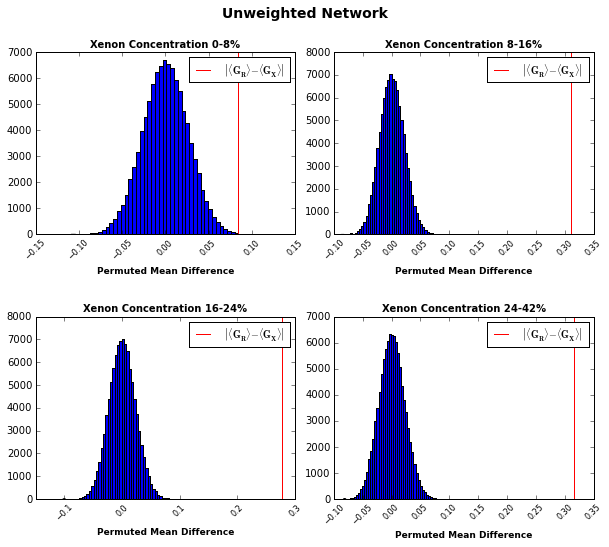

In [63]:
a_lvl = ['0-8', '8-16', '16-24', '24-42']
p_value = []
fig = plt.figure(1,figsize=(10,8))
fig.subplots_adjust(hspace=.45)
fig.subplots_adjust(wspace=.15)
fig.suptitle('Unweighted Network', fontsize=14,fontweight = 'bold')

for Q in range(1,2):
    z = Q
    test = REST_GM[z].tolist()
    test_a = A_GM[z].tolist()
    nets = 669
    TEST_MEAN = [np.mean(test[0:150]),np.mean(test_a[0:nets]),np.mean(test_a[nets:nets*2]),
                 np.mean(test_a[nets*2:nets*3]),np.mean(test_a[3*nets:nets*4])]
    print Q
    for x in range(0,4):
        DIFF = (TEST_MEAN[0] - TEST_MEAN[(x+1)])
        D_test = []
        ECMM = copy.deepcopy(test[0:150])
        ECMM.extend(copy.deepcopy(test_a[(nets*(x)):(nets*(x+1))]))
        Iter = 100000
        for i in range(0,Iter):
            np.random.shuffle(ECMM)
            TEST_M = [np.mean(ECMM[0:150]),np.mean(ECMM[150:])]
            D_test.append((TEST_M[0] - TEST_M[1]))
        tally = 0
        for k in range(0,len(D_test)):
            if abs(D_test[k])>=abs(DIFF):
                tally = tally+1
        p_value.append(1.0*tally/(1.0*Iter))
        plt.subplot(4,2,((Q*4)+(x+1)))
        plt.hist(D_test,bins=50)
        plt.title('Xenon Concentration '+(a_lvl[x])+'%',fontsize=10,fontweight = 'bold')
        plt.axvline(x=DIFF,color='red',label = r' $\bf{\left|\langle G_{R}\rangle -\langle G_{X}\rangle\right|}$ ')
        plt.xticks(fontsize = 8, rotation = 45)
        plt.xlabel('Permuted Mean Difference',fontweight='bold',fontsize=9)
        plt.legend(fontsize = 10)
        if Q==0 and x==0:
            plt.ylabel('Frequency',fontweight='bold')
        if Q==0 and x==2:
            plt.ylabel('Frequency',fontweight='bold')
fig.subplots_adjust(top=1.82)

# plt.savefig('perm_hist_eeg_gspl_u.eps',format='eps')
        
# count = 0
# for i in range(0,15):
#     print p_value[count:count+4]
#     count = count+4
print p_value

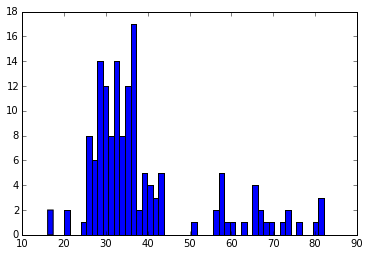

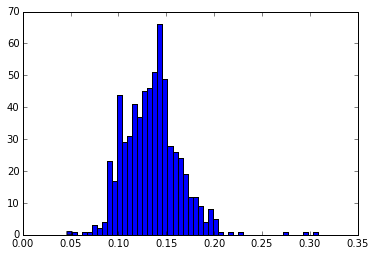

In [151]:
plt.hist(MEANS[4][0:150],bins=50)
# plt.hist(MEANS[5][150:795],bins=50)
plt.show()
plt.hist([MEANS[5][2085:2730]],bins=50)
plt.show()

In [7]:
print len(MEANS[0])

2825


### EEG NETWORK METRIC BOX PLOTS

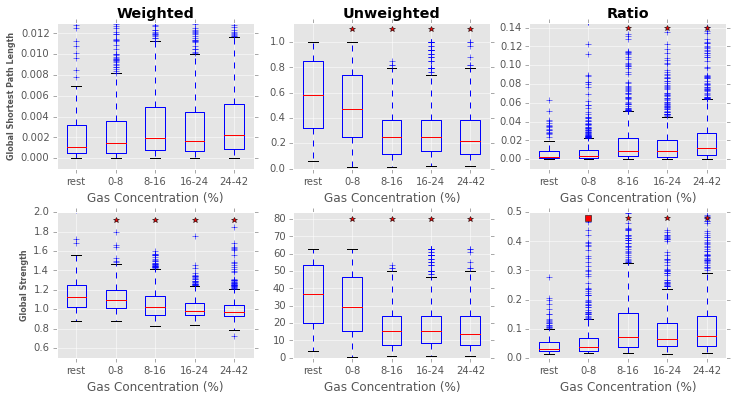

In [4]:
fig = plt.figure(1,figsize=(12,6))
fig.subplots_adjust(hspace=.3)
# fig.subplots_adjust(wspace=.3)
# [g_wspl, g_spl, e_spl, g_str, g_deg, e_deg, g_wcc, g_cc, e_cc, g_evcw, g_evc, e_evc, g_efw, g_ef, e_gef]
plt.subplot(231)
z = 0
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')
# plt.setp(xtickNames, rotation=45, fontsize=8)
plt.ylim(-0.001,0.013)
# plt.plot(5,0.012,'rs')
# plt.plot(5,0.012,'rs')
# plt.plot(4,0.012,'r*')
# plt.plot(3,0.012,'r*')
plt.ylabel('Global Shortest Path Length',fontsize=8, fontweight = 'bold')
# plt.ylabel('Global SPL')
plt.title('Weighted',fontweight = 'bold')

plt.subplot(232)
z = 1
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')
plt.plot(2,1.10,'r*')
plt.plot(3,1.10,'r*')
plt.plot(4,1.10,'r*')
plt.plot(5,1.10,'r*')
plt.ylim(0,1.15)
plt.title('Unweighted',fontweight = 'bold')

plt.subplot(233)
z = 2
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)

plt.plot(3,0.14,'r*')
plt.plot(4,0.14,'r*')
plt.plot(5,0.14,'r*')
plt.ylim(-0.01,0.145)
plt.xlabel('Gas Concentration (%)')
plt.title('Ratio',fontweight = 'bold')

plt.subplot(234)
z = 3
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.ylabel('Global Strength',fontsize=8, fontweight = 'bold')

plt.plot(2,1.92,'r*')
plt.plot(3,1.92,'r*')
plt.plot(4,1.92,'r*')
plt.plot(5,1.92,'r*')
plt.ylim(0.5,2)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10)

plt.subplot(235)
z = 4
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.plot(2,80,'r*')
plt.plot(3,80,'r*')
plt.plot(4,80,'r*')
plt.plot(5,80,'r*')
plt.ylim(0,84)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')

plt.subplot(236)
z = 5
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.plot(2,0.48,'rs')
plt.plot(3,0.48,'r*')
plt.plot(4,0.48,'r*')
plt.plot(5,0.48,'r*')
plt.ylim(0,0.5)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')
# plt.savefig('Box_gm_eeg_1.eps',format='eps')
plt.show()

In [9]:
print plt.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


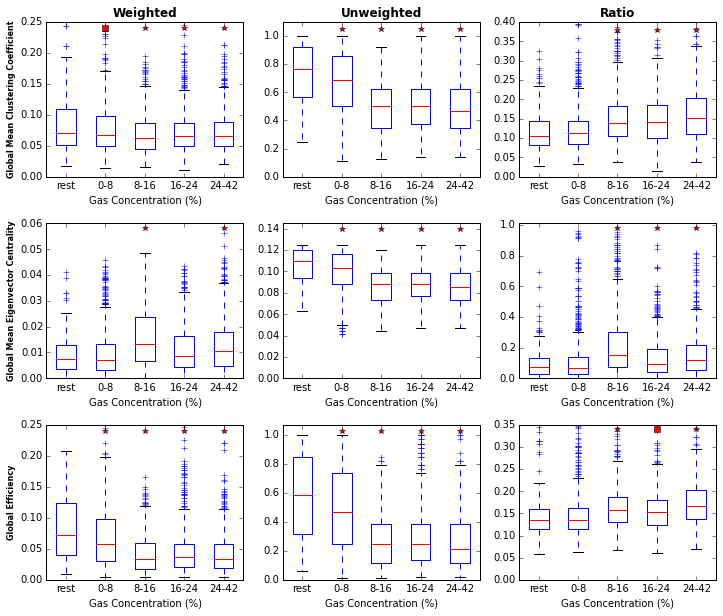

In [51]:
fig = plt.figure(1,figsize=(12,10))
fig.subplots_adjust(hspace=.3)
# fig.subplots_adjust(wspace=.3)
# [g_wspl, g_spl, e_spl, g_str, g_deg, e_deg, g_wcc, g_cc, e_cc, g_evcw, g_evc, e_evc, g_efw, g_ef, e_gef]



plt.subplot(331)
z = 6
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.ylabel('Global Mean Clustering Coefficient',fontsize=8, fontweight = 'bold')
plt.boxplot(boxes_total)
plt.title('Weighted', fontweight = 'bold')
plt.plot(2,0.24,'rs')
plt.plot(3,0.24,'r*')
plt.plot(4,0.24,'r*')
plt.plot(5,0.24,'r*')
plt.ylim(0,0.25)

plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.xlabel('Gas Concentration (%)')

plt.subplot(332)
z = 7
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.title('Unweighted', fontweight = 'bold')
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.plot(2,1.05,'r*')
plt.plot(3,1.05,'r*')
plt.plot(4,1.05,'r*')
plt.plot(5,1.05,'r*')
plt.ylim(0,1.1)
plt.xlabel('Gas Concentration (%)')

plt.subplot(333)
z = 8
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.title('Ratio', fontweight = 'bold')
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
# plt.plot(2,0.38,'r*')
plt.plot(3,0.38,'r*')
plt.plot(4,0.38,'r*')
plt.plot(5,0.38,'r*')
plt.ylim(0,0.4)
plt.xlabel('Gas Concentration (%)')

plt.subplot(334)
z = 9
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
# plt.ylabel('Global EVC')
plt.ylabel('Global Mean Eigenvector Centrality',fontsize=8, fontweight = 'bold')
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
# plt.plot(2,0.058,'r*')
plt.plot(3,0.058,'r*')
# plt.plot(4,0.058,'r*')
plt.plot(5,0.058,'r*')
plt.ylim(0,0.06)
plt.xlabel('Gas Concentration (%)')

plt.subplot(335)
z = 10
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.plot(2,0.14,'r*')
plt.plot(3,0.14,'r*')
plt.plot(4,0.14,'r*')
plt.plot(5,0.14,'r*')
plt.ylim(0,0.145)
plt.xlabel('Gas Concentration (%)')

plt.subplot(336)
z = 11
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)

# plt.plot(2,0.98,'r*')
plt.plot(3,0.98,'r*')
plt.plot(4,0.98,'r*')
plt.plot(5,0.98,'r*')
plt.ylim(0,1.01)
plt.xlabel('Gas Concentration (%)')

plt.subplot(337)
z = 12
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
# plt.ylabel('Global EFF')
plt.ylabel('Global Efficiency',fontsize=8, fontweight = 'bold')
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.plot(2,0.24,'r*')
plt.plot(3,0.24,'r*')
plt.plot(4,0.24,'r*')
plt.plot(5,0.24,'r*')
plt.ylim(0,0.25)
plt.xlabel('Gas Concentration (%)')

plt.subplot(338)
z = 13
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
plt.plot(2,1.03,'r*')
plt.plot(3,1.03,'r*')
plt.plot(4,1.03,'r*')
plt.plot(5,1.03,'r*')
plt.ylim(0,1.07)
plt.xlabel('Gas Concentration (%)')

plt.subplot(339)
z = 14
boxes_rest = [MEANS[z][0:150]]
boxes_1 = [MEANS[z][150:820]]
boxes_2 = [MEANS[z][820:1485]]
boxes_3 = [MEANS[z][1485:2154]]
boxes_4 = [MEANS[z][2154:2725]]
boxes_total = [boxes_rest, boxes_1, boxes_2, boxes_3, boxes_4]
plt.boxplot(boxes_total)
# plt.plot(2,0.34,'r*')
plt.plot(3,0.34,'r*')
plt.plot(4,0.34,'rs')
plt.plot(5,0.34,'r*')
plt.ylim(0,0.35)
plt.xticks([1,2,3,4,5],['rest', '0-8', '8-16', '16-24', '24-42'],fontsize = 10) #rotation = 45)
# plt.text(5,0.4,'X')
plt.xlabel('Gas Concentration (%)')
# plt.savefig('Box_gm_eeg_2.eps',format = 'eps')

plt.show()